In [80]:
#import packages
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
from skimage.io import imread, imshow
from skimage.transform import resize
import tensorflow as tf
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from PIL import Image
import glob
import PIL
import os.path
import cv2
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers, callbacks
import pandas as pd
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers.experimental import preprocessing
import sklearn.metrics as skmet
import itertools
from keras.models import load_model

In [89]:
infected_path = 'C:/Users/shara/Documents/ML Projects/Malaria cells/Datasets/cell_images/Parasitized' 
uninfected_path = 'C:/Users/shara/Documents/ML Projects/Malaria cells/Datasets/cell_images/Uninfected'
#Load in the data 
infected_files = glob.glob(infected_path+'/*.png')
uninfected_files = glob.glob(uninfected_path+'/*.png')

np.random.seed(42)

files_df = pd.DataFrame({
    'filename': infected_files + uninfected_files,
    'label': ['malaria'] * len(infected_files) + ['healthy'] * len(uninfected_files)
}).sample(frac=1, random_state=42).reset_index(drop=True)

files_df.head()

,filename,label
0,C:/Users/shara/Documents/ML Projects/Malaria c...,malaria
1,C:/Users/shara/Documents/ML Projects/Malaria c...,malaria
2,C:/Users/shara/Documents/ML Projects/Malaria c...,healthy
3,C:/Users/shara/Documents/ML Projects/Malaria c...,healthy
4,C:/Users/shara/Documents/ML Projects/Malaria c...,healthy


In [7]:
data = []
labels = []

for i in infected:
    try:
    
        image = cv2.imread("C:/Users/shara/Documents/ML Projects/Malaria cells/Datasets/cell_images/cell_images/Parasitized/"+i)
        image_array = Image.fromarray(image , 'RGB')
        resize_img = image_array.resize((50 , 50))
        rotated45 = resize_img.rotate(45)
        rotated75 = resize_img.rotate(75)
        blur = cv2.blur(np.array(resize_img) ,(10,10))
        data.append(np.array(resize_img))
        data.append(np.array(rotated45))
        data.append(np.array(rotated75))
        data.append(np.array(blur))
        labels.append(1)
        labels.append(1)
        labels.append(1)
        labels.append(1)
        
    except AttributeError:
        print('')
    
for u in uninfected:
    try:
        
        image = cv2.imread("C:/Users/shara/Documents/ML Projects/Malaria cells/Datasets/cell_images/cell_images/Uninfected/"+u)
        image_array = Image.fromarray(image , 'RGB')
        resize_img = image_array.resize((50 , 50))
        rotated45 = resize_img.rotate(45)
        rotated75 = resize_img.rotate(75)
        data.append(np.array(resize_img))
        data.append(np.array(rotated45))
        data.append(np.array(rotated75))
        labels.append(0)
        labels.append(0)
        labels.append(0)
        
    except AttributeError:
        print('')

In [8]:
cells = np.array(data)
labels = np.array(labels)

np.save('Cells' , cells)
np.save('Labels' , labels)

In [9]:
print('Cells : {} | labels : {}'.format(cells.shape , labels.shape))

Cells : (96445, 50, 50, 3) | labels : (96445,)


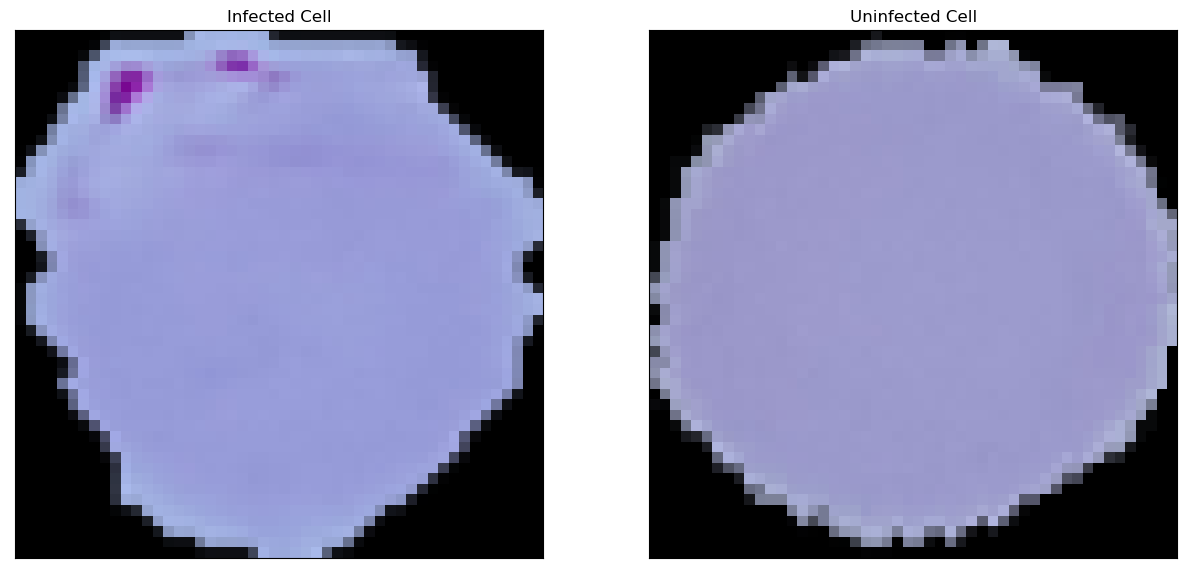

In [11]:
plt.figure(1, figsize = (15 , 7))
plt.subplot(1 , 2 , 1)
plt.imshow(cells[0])
plt.title('Infected Cell')
plt.xticks([]) , plt.yticks([])

plt.subplot(1 , 2 , 2)
plt.imshow(cells[60000])
plt.title('Uninfected Cell')
plt.xticks([]) , plt.yticks([])

plt.show()

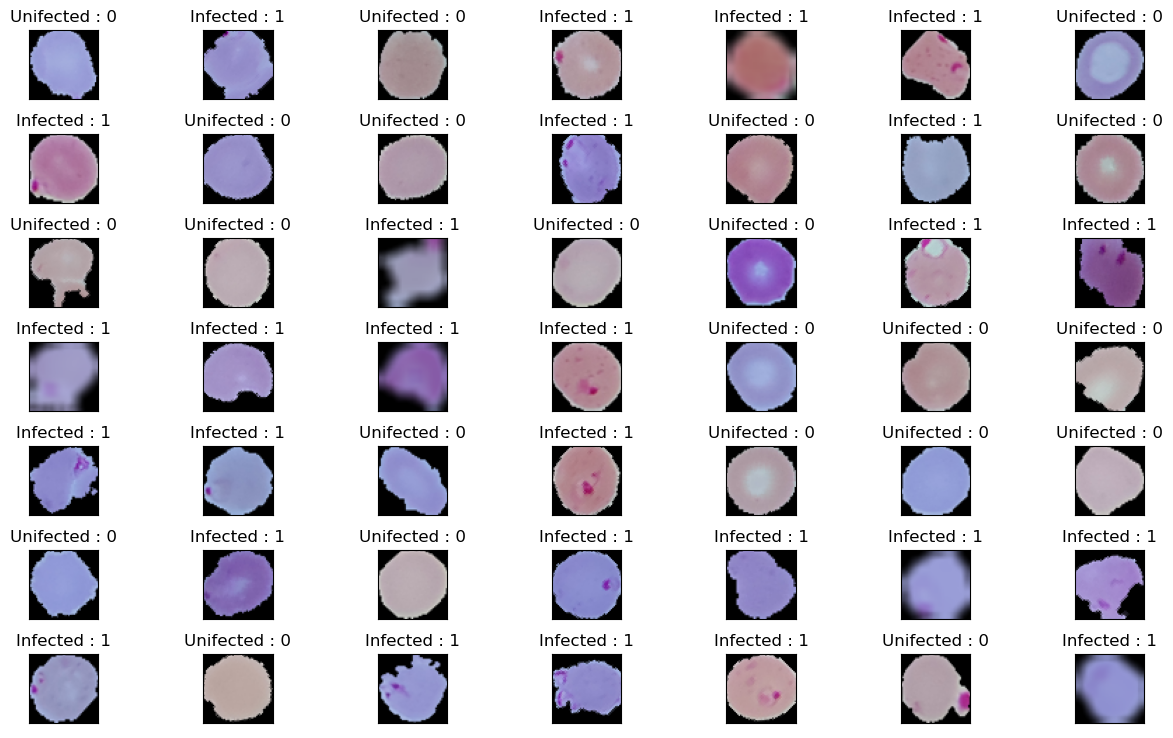

In [34]:
plt.figure(1 , figsize = (15 , 9))
n = 0 
for i in range(49):
    n += 1 
    r = np.random.randint(0 , cells.shape[0] , 1)
    plt.subplot(7 , 7 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    plt.imshow(cells[r[0]])
    plt.title('{} : {}'.format('Infected' if labels[r[0]] == 1 else 'Unifected' ,
                               labels[r[0]]) )
    plt.xticks([]) , plt.yticks([])
    
plt.show()

Text(0.5, 1.0, 'Healthy')

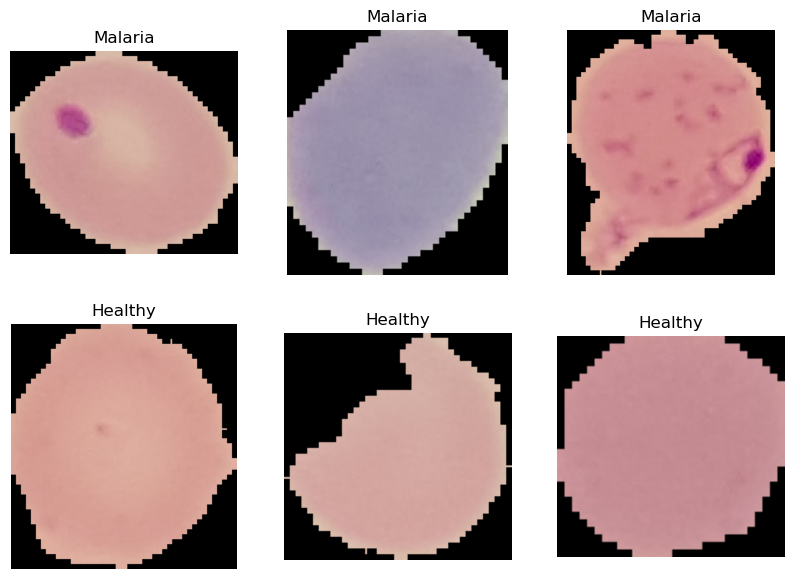

In [90]:
fig = plt.figure(figsize = (10, 7))

# setting values to rows and column variables
rows = 2
columns = 3

# reading images
M1 = Image.open(infected_files[567])
M2 = Image.open(infected_files[4783])
M3 = Image.open(infected_files[89])
H1 = Image.open(uninfected_files[20])
H2 = Image.open(uninfected_files[678])
H3 = Image.open(uninfected_files[472])


# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)

# showing image
plt.imshow(M1)
plt.axis("off")
plt.title("Malaria")

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)

# showing image
plt.imshow(M2)
plt.axis("off")
plt.title("Malaria")

# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)

# showing image
plt.imshow(M3)
plt.axis("off")
plt.title("Malaria")

# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)

# showing image
plt.imshow(H1)
plt.axis("off")
plt.title("Healthy")

# Adds a subplot at the 5th position
fig.add_subplot(rows, columns, 5)

# showing image
plt.imshow(H2)
plt.axis("off")
plt.title("Healthy")

# Adds a subplot at the 6th position
fig.add_subplot(rows, columns, 6)

# showing image
plt.imshow(H3)
plt.axis("off")
plt.title("Healthy")

In [91]:
# Check if the images are the same size

# get width and height
width1 = M1.width
height1 = M1.height
  
# display width and height
print("The height of image 1 is: ", height1)
print("The width of image 1 is: ", width1)

# get width and height
width2 = M2.width
height2 = M2.height
  
# display width and height
print("The height of image 2 is: ", height2)
print("The width of image 2 is: ", width2)

The height of image 1 is:  121
The width of image 1 is:  136
The height of image 2 is:  118
The width of image 2 is:  106


In [92]:
resized_df = []
labels_names = []
for file in range(0, len(files_df)):
    img_array = cv2.imread(files_df.iloc[file,0])
    img = Image.fromarray(img_array, 'RGB')
    img_resized = img.resize((50,50), Image.ANTIALIAS)
    resized_df.append(np.array(img_resized))
    labels_names.append(files_df.iloc[file,1])

# recode labels to numbers instead of names
labels_recoded = []
for i in labels_names:
    if i == "malaria":
        labels_recoded.append(1)
    else:
        labels_recoded.append(0)


# change the data and the labels to arrays so it's suitable for the CNN
data = np.array(resized_df)
labels = np.array(labels_recoded)

# change to datatypes suitable for the CNN
data = data.astype(np.float32) 
labels = labels.astype(np.int32) 

# scale the data
data = data/255

C:\Users\shara\AppData\Local\Temp\ipykernel_4192\3265697716.py:6: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img_resized = img.resize((50,50), Image.ANTIALIAS)


In [93]:
#Check if resizing worked
print("There are", data.shape[0], "pictures.") #All picteres are there!
print("All picture have a width of", data.shape[1], "and a length of", data.shape[2], "pixels.")
print("And all picture have", data.shape[3], "color channels.")

There are 27558 pictures.
All picture have a width of 50 and a length of 50 pixels.
And all picture have 3 color channels.


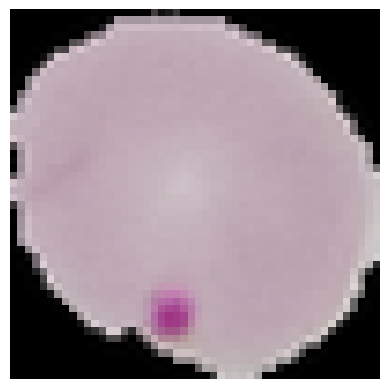

In [94]:
# get image
img = data[1]

# show the image
plt.imshow(img)
plt.axis('off')
plt.show();

In [95]:
# split data set into train, validation and test datset using 60:10:30 split
train_data, test_data, train_labels, test_labels = train_test_split(data,
                                                                    labels, 
                                                                    test_size = 0.3,
                                                                    random_state = 42)
train_data, val_data, train_labels, val_labels = train_test_split(train_data,
                                                                  train_labels,
                                                                  test_size = 0.1,
                                                                  random_state = 42)

In [96]:
print("Train files:", len(train_data),"\nVal files:", len(val_data),"\nTest files:", len(test_data))
print('Train labels:', len(train_labels), '\nVal labels:', len(val_labels), '\nTest labels:', len(test_labels))

Train files: 17361 
Val files: 1929 
Test files: 8268
Train labels: 17361 
Val labels: 1929 
Test labels: 8268


In [98]:
input_shape = [50, 50, 3]
model1 = keras.Sequential([
    # Input Shape
    layers.InputLayer(input_shape = input_shape),

    # First Convolutional Block
    layers.Conv2D(filters = 32, kernel_size = 3, activation = "relu", padding = "same"),
    layers.MaxPool2D(),

    # Second Convolutional Block
    layers.Conv2D(filters = 64, kernel_size = 3, activation = "relu", padding = "same"),
    layers.MaxPool2D(),

    # Third Convolutional Block
    layers.Conv2D(filters = 128, kernel_size = 3, activation = "relu", padding = "same"),
    layers.MaxPool2D(),

    # Classifier Head
    layers.Flatten(),
    layers.Dense(units = 512, activation = "relu"),
    layers.Dropout(rate = 0.3),
    layers.Dense(units = 512, activation = "relu"),
    layers.Dropout(rate = 0.3),
    layers.Dense(1, activation = "sigmoid")
])
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 50, 50, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 25, 25, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 6, 6, 128)       

In [99]:
model1.compile(
    optimizer = "adam",
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

history1 = model1.fit(
    train_data,
    train_labels,
    validation_data = (val_data, val_labels),
    batch_size = 64,
    epochs = 25,
    verbose = 1,
)

model1.save("Model1.h5")

Epoch 1/25
272/272 [==============================] - 40s 145ms/step - loss: 0.3962 - accuracy: 0.7981 - val_loss: 0.1422 - val_accuracy: 0.9523
Epoch 2/25
272/272 [==============================] - 42s 155ms/step - loss: 0.1532 - accuracy: 0.9516 - val_loss: 0.1465 - val_accuracy: 0.9461
Epoch 3/25
272/272 [==============================] - 41s 149ms/step - loss: 0.1336 - accuracy: 0.9559 - val_loss: 0.1217 - val_accuracy: 0.9627
Epoch 4/25
272/272 [==============================] - 39s 144ms/step - loss: 0.1218 - accuracy: 0.9586 - val_loss: 0.1217 - val_accuracy: 0.9616
Epoch 5/25
272/272 [==============================] - 39s 144ms/step - loss: 0.1110 - accuracy: 0.9610 - val_loss: 0.1125 - val_accuracy: 0.9611
Epoch 6/25
272/272 [==============================] - 39s 145ms/step - loss: 0.1032 - accuracy: 0.9652 - val_loss: 0.1121 - val_accuracy: 0.9622
Epoch 7/25
272/272 [==============================] - 39s 144ms/step - loss: 0.0934 - accuracy: 0.9666 - val_loss: 0.1204 - val_ac

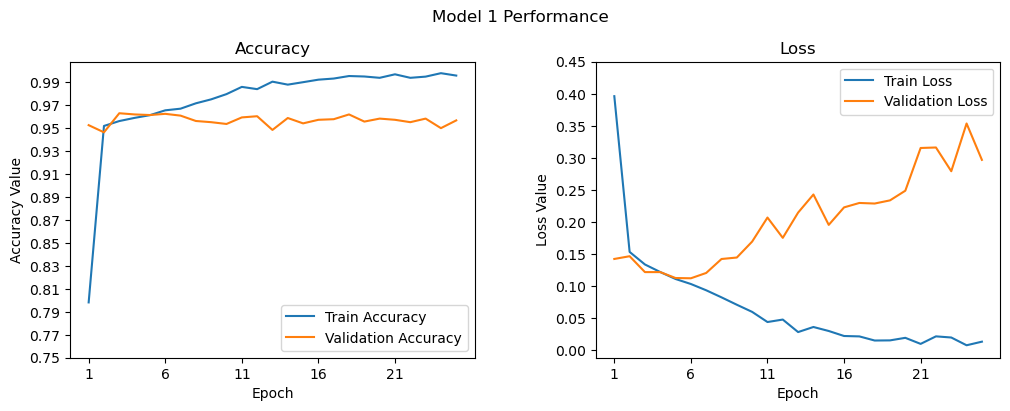

In [100]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 4))
t = f.suptitle("Model 1 Performance", fontsize = 12)
f.subplots_adjust(top = 0.85, wspace = 0.3)

max_epoch = len(history1.history["accuracy"])+1
epoch_list = list(range(1, max_epoch))
ax1.plot(epoch_list, history1.history["accuracy"], label = "Train Accuracy")
ax1.plot(epoch_list, history1.history["val_accuracy"], label = "Validation Accuracy")
ax1.set_xticks(np.arange(1, max_epoch, 5))
ax1.set_yticks(np.arange(0.75, 1, 0.02))
ax1.set_ylabel("Accuracy Value")
ax1.set_xlabel("Epoch")
ax1.set_title("Accuracy")
l1 = ax1.legend(loc = 4)

ax2.plot(epoch_list, history1.history["loss"], label = "Train Loss")
ax2.plot(epoch_list, history1.history["val_loss"], label = "Validation Loss")
ax2.set_xticks(np.arange(1, max_epoch, 5))
ax2.set_yticks(np.arange(0.0, 0.5, 0.05))
ax2.set_ylabel("Loss Value")
ax2.set_xlabel("Epoch")
ax2.set_title("Loss")
l2 = ax2.legend(loc = "best")

In [101]:
history1_frame = pd.DataFrame(history1.history)
print("Model 1 maximum validation accuracy: {}".format(history1_frame["val_accuracy"].max()))

Model 1 maximum validation accuracy: 0.9626749753952026


In [103]:
# Confusion matrix function

def plot_confusion_matrix(cm,
                          classes,
                          title = "Confusion matrix",
                          cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation = "nearest", cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, 
                 cm[i, j],
                 horizontalalignment = "center",
                 color = "white" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

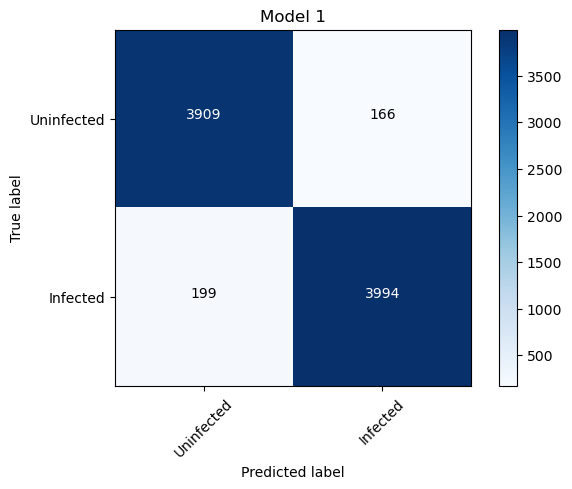

In [104]:
# Model 1
model1 = load_model("Model1.h5")

y_pred_model1 = model1.predict(test_data)
y_pred1 = np.round(y_pred_model1)

cm_plot_labels = ["Uninfected", "Infected"]
cm1 = skmet.confusion_matrix(y_true = test_labels, y_pred = y_pred1)

plot_confusion_matrix(cm = cm1, classes = cm_plot_labels, title = "Model 1")

In [105]:
#Model 1
# accuracy
accuracy_m1 = skmet.accuracy_score(test_labels, y_pred1)
# precision 
precision_m1 = skmet.precision_score(test_labels, y_pred1)
# recall
recall_m1 = skmet.recall_score(test_labels, y_pred1)
# f1
f1_m1 = skmet.f1_score(test_labels, y_pred1)

In [110]:
model2 = keras.Sequential([
   layers.InputLayer(input_shape = input_shape),
    
    # Data Augmentation
    preprocessing.RandomContrast(factor = 0.05),
    preprocessing.RandomContrast(factor = 0.10),
    preprocessing.RandomContrast(factor = 0.15),
    preprocessing.RandomFlip(mode = "horizontal"),
    preprocessing.RandomRotation(factor = 0.05),
    preprocessing.RandomRotation(factor = 0.10),
    preprocessing.RandomRotation(factor = 0.15),
    
    # First Convolutional Block
    layers.Conv2D(filters = 32, kernel_size = 3, activation = "relu", padding = "same"),
    layers.MaxPool2D(),

    # Second Convolutional Block
    layers.Conv2D(filters = 64, kernel_size = 3, activation = "relu", padding = "same"),
    layers.MaxPool2D(),

    # Third Convolutional Block
    layers.Conv2D(filters = 128, kernel_size = 3, activation = "relu", padding = "same"),
    layers.MaxPool2D(),


    # Classifier Head
    layers.Flatten(),
    layers.Dense(units = 10, activation = "relu"),
    layers.Dense(units = 10, activation = "relu"),
    layers.Dense(units = 1, activation = "sigmoid"),
])
model2.compile(optimizer = tf.keras.optimizers.RMSprop(lr=1e-4),
                loss = "binary_crossentropy",
                metrics = ["accuracy"])
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_contrast_6 (RandomCo  (None, 50, 50, 3)        0         
 ntrast)                                                         
                                                                 
 random_contrast_7 (RandomCo  (None, 50, 50, 3)        0         
 ntrast)                                                         
                                                                 
 random_contrast_8 (RandomCo  (None, 50, 50, 3)        0         
 ntrast)                                                         
                                                                 
 random_flip_2 (RandomFlip)  (None, 50, 50, 3)         0         
                                                                 
 random_rotation_6 (RandomRo  (None, 50, 50, 3)        0         
 tation)                                              

C:\Users\shara\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [111]:
history2 = model2.fit(train_data,
                    train_labels, 
                    validation_data = (val_data,val_labels),
                    batch_size = 64,
                    epochs = 25,
                    verbose = 1)

model2.save("Model2.h5")

Epoch 1/25


272/272 [==============================] - 59s 191ms/step - loss: 0.6870 - accuracy: 0.5030 - val_loss: 0.6784 - val_accuracy: 0.5029
Epoch 2/25
272/272 [==============================] - 56s 206ms/step - loss: 0.6644 - accuracy: 0.5853 - val_loss: 0.6964 - val_accuracy: 0.5111
Epoch 3/25
272/272 [==============================] - 56s 208ms/step - loss: 0.6120 - accuracy: 0.6803 - val_loss: 0.5912 - val_accuracy: 0.7055
Epoch 4/25
272/272 [==============================] - 56s 207ms/step - loss: 0.5692 - accuracy: 0.7126 - val_loss: 0.5485 - val_accuracy: 0.7216
Epoch 5/25
272/272 [==============================] - 56s 205ms/step - loss: 0.5364 - accuracy: 0.7343 - val_loss: 0.5223 - val_accuracy: 0.7605
Epoch 6/25
272/272 [==============================] - 56s 206ms/step - loss: 0.5004 - accuracy: 0.7618 - val_loss: 0.4838 - val_accuracy: 0.7833
Epoch 7/25
272/272 [==============================] - 56s 206ms/step - loss: 0.4568 - accuracy: 0.7912 - val_loss: 0.4216 - val_accuracy: 0.8

259/259 [==============================] - 6s 21ms/step


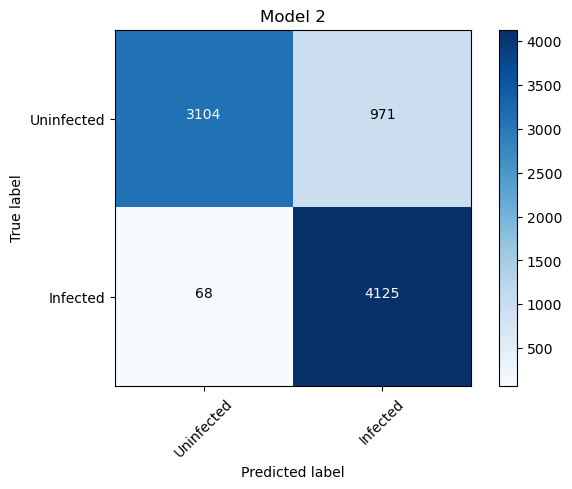

In [112]:
# Model 2
model2 = load_model("Model2.h5")

y_pred_model2 = model2.predict(test_data)
y_pred2 = np.round(y_pred_model2)

cm2 = skmet.confusion_matrix(y_true = test_labels, y_pred = y_pred2)

plot_confusion_matrix(cm = cm2, classes = cm_plot_labels, title = "Model 2")

In [113]:
accuracy_m2 = skmet.accuracy_score(test_labels, y_pred2)
# precision 
precision_m2 = skmet.precision_score(test_labels, y_pred2)
# recall
recall_m2 = skmet.recall_score(test_labels, y_pred2)
# f1
f1_m2 = skmet.f1_score(test_labels, y_pred2)

In [114]:
data = {"Accuracy": [accuracy_m1, accuracy_m2],
        "Precision": [precision_m1, precision_m2],
        "Recall": [recall_m1, recall_m2],
        "F1-score": [f1_m1, f1_m2]
       }
data

{'Accuracy': [0.9558538945331398, 0.8743347847121432],
 'Precision': [0.9600961538461539, 0.8094583987441131],
 'Recall': [0.9525399475316003, 0.9837824946339137],
 'F1-score': [0.956303124625883, 0.8881472709656584]}

In [115]:
model_comp = pd.DataFrame(data, index = ["Model 1", "Model 2"])
model_comp

,Accuracy,Precision,Recall,F1-score
Model 1,0.955854,0.960096,0.952540,0.956303
Model 2,0.874335,0.809458,0.983782,0.888147


In [116]:
import pickle
pickle.dump(model1, open('model1.pkl', 'wb'))
pickle.dump(model2, open('model2.pkl', 'wb'))

INFO:tensorflow:Assets written to: ram://1cb0cf27-0340-4977-97ef-c937d10f3958/assets


INFO:tensorflow:Assets written to: ram://1cb0cf27-0340-4977-97ef-c937d10f3958/assets


INFO:tensorflow:Assets written to: ram://08578262-91c9-4d98-8af4-ce7dadb13f50/assets


INFO:tensorflow:Assets written to: ram://08578262-91c9-4d98-8af4-ce7dadb13f50/assets
